<a href="https://colab.research.google.com/github/Swayyum/Intro-to-ML--4105/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Intro to ML Collab/Datasets/D3.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
sample.head()
df = pd.read_csv(file_path)
print (df.head())

         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


In [ ]:
# Separate features and labels
X1 = df.values[:, 0]  # get input values from the first column for X1
X2 = df.values[:, 1]  # get input values from the second column for X2
X3 = df.values[:, 2]  # get input values from the third column for X3
y = df.values[:, 3]   # get output values from the fourth column for y
m = len(y)  # Number of training examples
n = len(X1)  # Number of training examples

# Display first 5 records of each feature and the total number of training examples
print('X1 = ', X1[:5])
print('X2 = ', X2[:5])
print('X3 = ', X3[:5])
print('y = ', y[:5])
print('m = ', m)
#print('n = ', n)

X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100


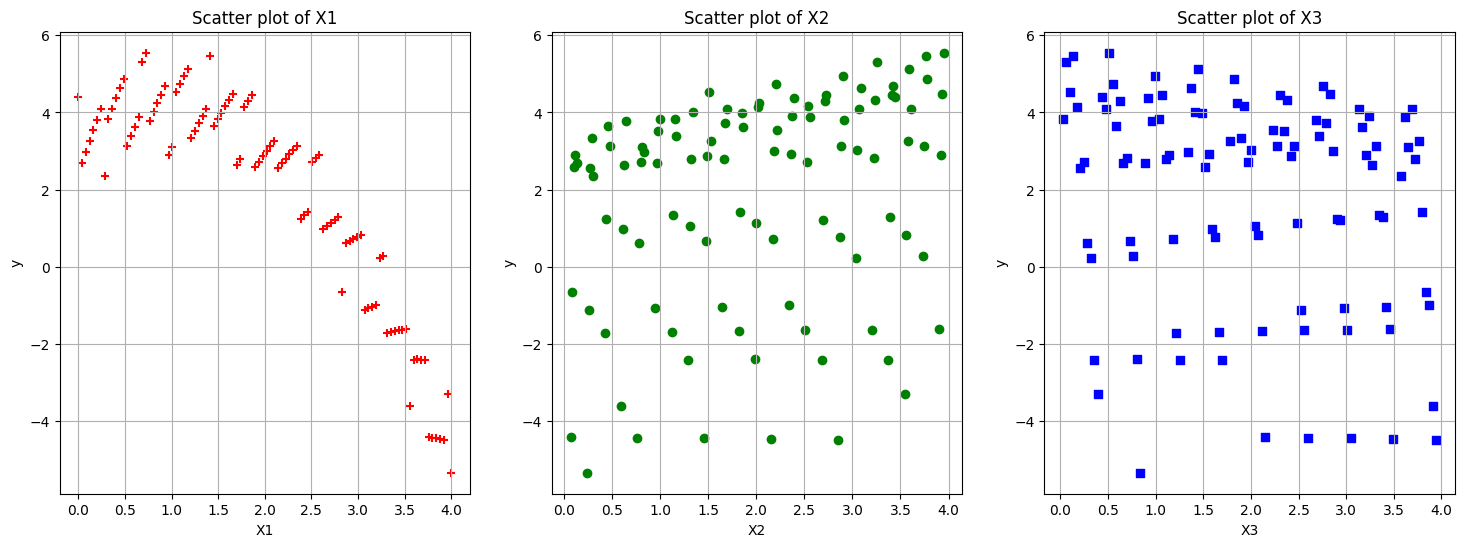

In [ ]:

# Create separate scatter plots for X1, X2, and X3
plt.figure(figsize=(18, 6))

# Scatter plot for X1
plt.subplot(131)
plt.scatter(X1, y, color='red', marker='+')
plt.grid(True)
plt.xlabel('X1')
plt.ylabel('y')
plt.title('Scatter plot of X1')

# Scatter plot for X2
plt.subplot(132)
plt.scatter(X2, y, color='green', marker='o')
plt.grid(True)
plt.xlabel('X2')
plt.ylabel('y')
plt.title('Scatter plot of X2')

# Scatter plot for X3
plt.subplot(133)
plt.scatter(X3, y, color='blue', marker='s')
plt.grid(True)
plt.xlabel('X3')
plt.ylabel('y')
plt.title('Scatter plot of X3')

# Show the plots
plt.show()

In [ ]:
X_0 = np.ones((m, 1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

# **PART A: One Variable at a time**
# X1

In [ ]:
X_1 = X1.reshape(m, 1)

In [ ]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1))
X[:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [ ]:
theta = np.zeros(2)
theta

array([0., 0.])

In [ ]:
def compute_cost(X, y, theta):

    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
# Lets compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):


    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [ ]:
theta = [0., 0.]
iterations = 1500
alpha = 0.01

In [ ]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 5.71850653 -1.9568206 ]
cost_history = [5.48226715 5.44290965 5.40604087 ... 0.99063932 0.99061433 0.99058944]


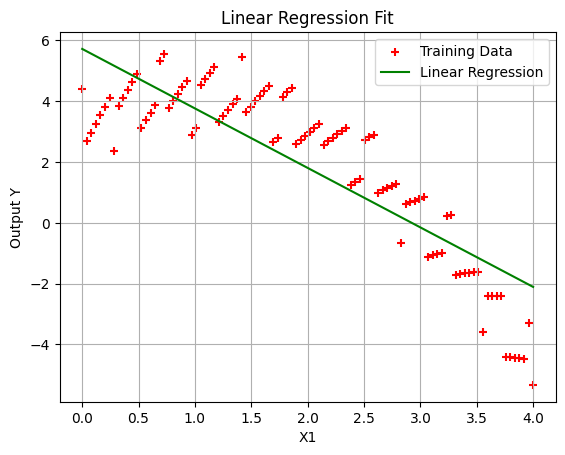

In [ ]:

# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X1')
plt.ylabel('Output Y')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()


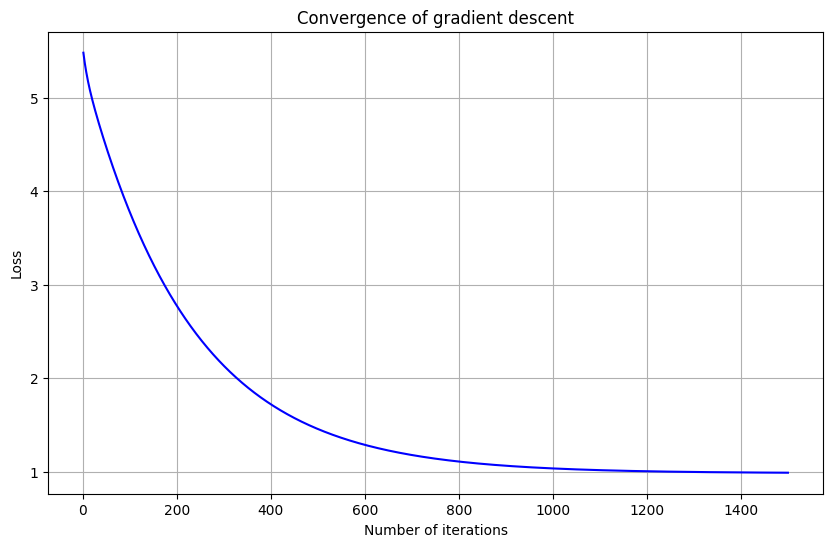

In [ ]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

# X2

The cost for given values of theta_0 and theta_2 = 5.524438459196242
Final value of theta = [0.71988473 0.56390334]
cost_history = [5.29831663 5.09909109 4.92356115 ... 3.5993997  3.59939955 3.5993994 ]


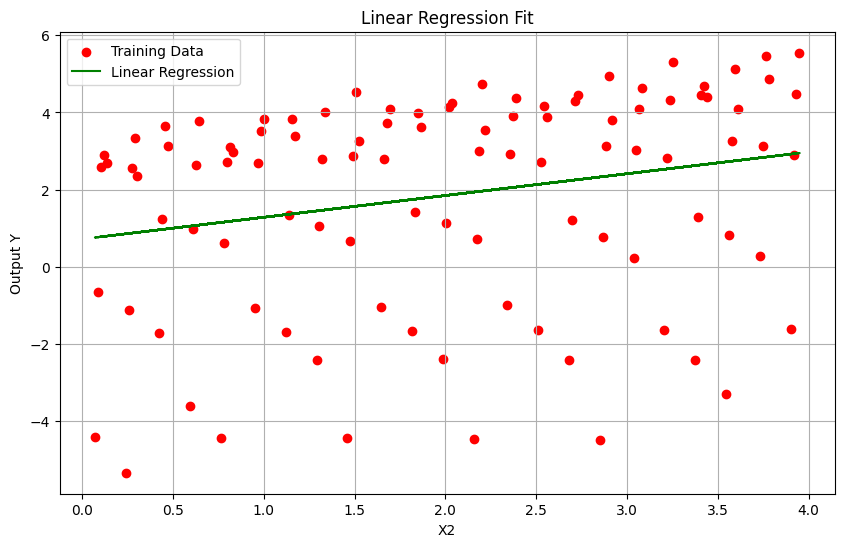

In [ ]:
# Lets use hstack() function from numpy to stack X_0 and X_2 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X_2 = X2.reshape(m, 1)
X__2 = np.hstack((X_0, X_2))

theta__1 = np.zeros(2)

# Lets compute the cost for theta values
cost_1 = compute_cost(X__2, y, theta__1)
print('The cost for given values of theta_0 and theta_2 =', cost_1)

theta__1 = [0., 0.]
iterations = 1500
alpha = 0.01

theta__1, cost_history_1 = gradient_descent(X__2, y, theta__1, alpha, iterations)
print('Final value of theta =', theta__1)
print('cost_history =', cost_history_1)


# Scatter plot for the training data
plt.scatter(X__2[:, 1], y, color='red', marker='o', label='Training Data')

# Line plot for the linear regression model
plt.plot(X__2[:, 1], X__2.dot(theta__1), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X2')
plt.ylabel('Output Y')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()

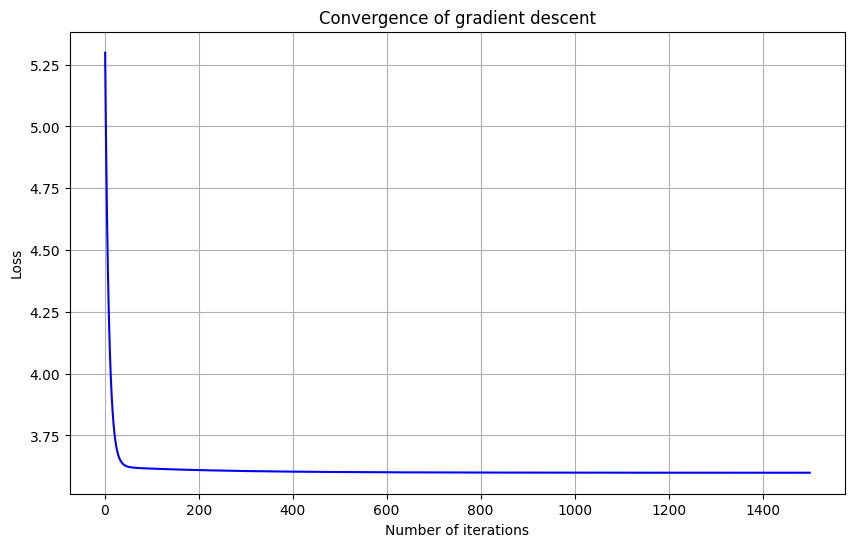

In [ ]:
plt.plot(range(1, iterations + 1), cost_history_1, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

# X3

The cost for given values of theta_0 and theta_3 = 5.524438459196242
Final value of theta = [ 2.78048129 -0.48451631]
cost_history = [5.40768785 5.30397076 5.21178297 ... 3.63053597 3.6305311  3.63052625]


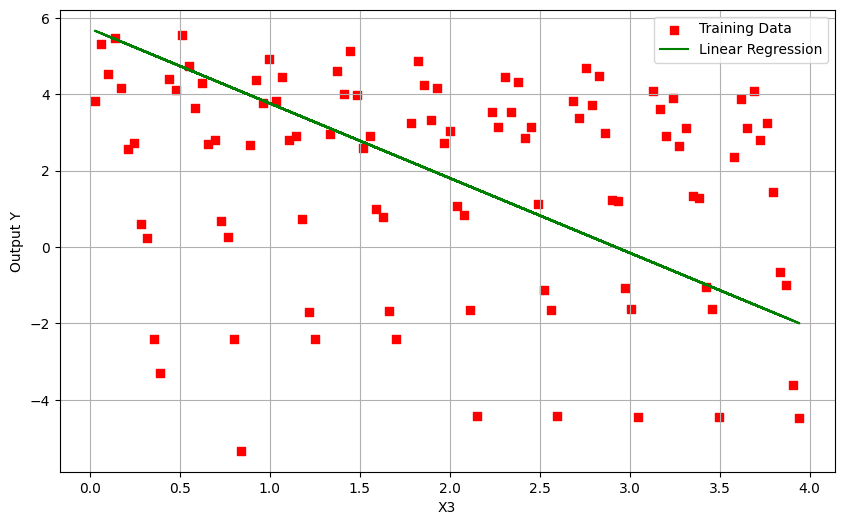

In [ ]:
# Lets use hstack() function from numpy to stack X_0 and X_3 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X_3 = X3.reshape(m, 1)

X__3 = np.hstack((X_0, X_3))

theta__3 = np.zeros(2)

cost_3 = compute_cost(X__3, y, theta__3)
print('The cost for given values of theta_0 and theta_3 =', cost_3)

gradient_descent(X__3, y, theta__3, alpha, iterations)

theta__3 = [0., 0.]
iterations = 1500
alpha = 0.01

theta__3, cost_history_2 = gradient_descent(X__3, y, theta__3, alpha, iterations)
print('Final value of theta =', theta__3)
print('cost_history =', cost_history_2)


# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X__3[:, 1], y, color='red', marker='s', label='Training Data')

# Line plot for the linear regression model
plt.plot(X__3[:, 1], X__3.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X3')
plt.ylabel('Output Y')
plt.legend()

# Show the plot
plt.show()

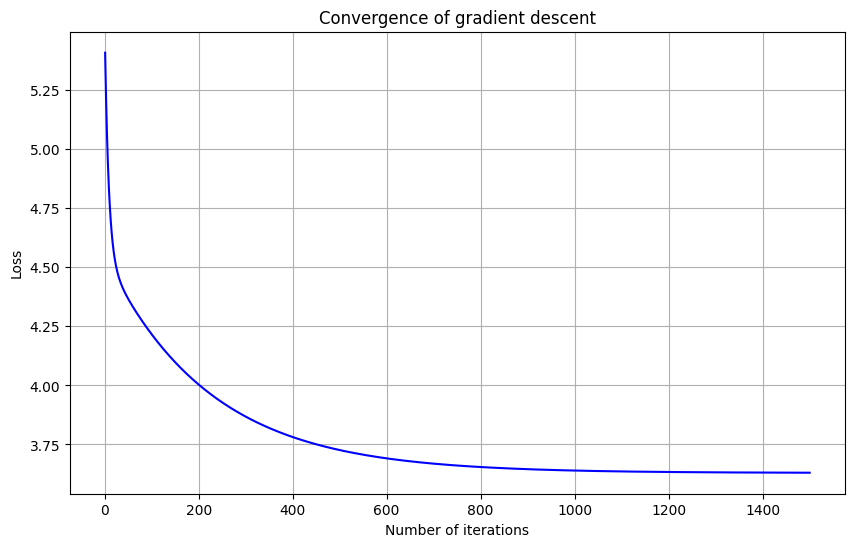

In [ ]:
plt.plot(range(1, iterations + 1), cost_history_2, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

# **PART B using All three explanatory variables **

In [ ]:
y = df.values[:, 3]   # Get output values from the fourth column for y
m = len(y)  # Number of training examples
X4 = df.values[:, 3]
X__4 = np.hstack((X_0, X_1, X_2, X_3))  # This will be our final X matrix (feature matrix)
X__4.shape

(100, 4)

In [ ]:
theta4 = np.zeros(4)  # Assuming X1 has a column of one

In [ ]:
cost4 = compute_cost(X__4, y, theta4)
print('The cost for given values of theta_0, theta_1, theta_2 and theta_3 =', cost4)

The cost for given values of theta_0, theta_1, theta_2 and theta_3 = 5.524438459196242


In [ ]:
gradient_descent(X__4, y, theta4, alpha, iterations)

(array([ 4.15118728, -1.8394291 ,  0.72473856, -0.09513266]),
 array([5.21542243, 4.97171977, 4.7765543 , ..., 0.81079843, 0.81065429,
        0.81051044]))

In [ ]:
theta4 = [0., 0., 0., 0.]  # X4's theta, assuming X4 has a column of ones
iterations = 1500
alpha = 0.1

In [ ]:
len(theta4)

4

In [ ]:
# Perform gradient descent for X4
theta4, cost_history4, = gradient_descent(X__4, y, theta4, alpha, iterations)
print('Final value of theta =', theta4)
print('cost_history =', cost_history4)

Final value of theta = [ 5.31416563 -2.00371905  0.53256359 -0.26560164]
cost_history = [4.13064348 3.51770697 3.12758306 ... 0.73846424 0.73846424 0.73846424]


In [ ]:
# Final values of theta for combined variable
print('Final value of theta for X4 =', theta4)

Final value of theta for X4 = [ 5.31416563 -2.00371905  0.53256359 -0.26560164]


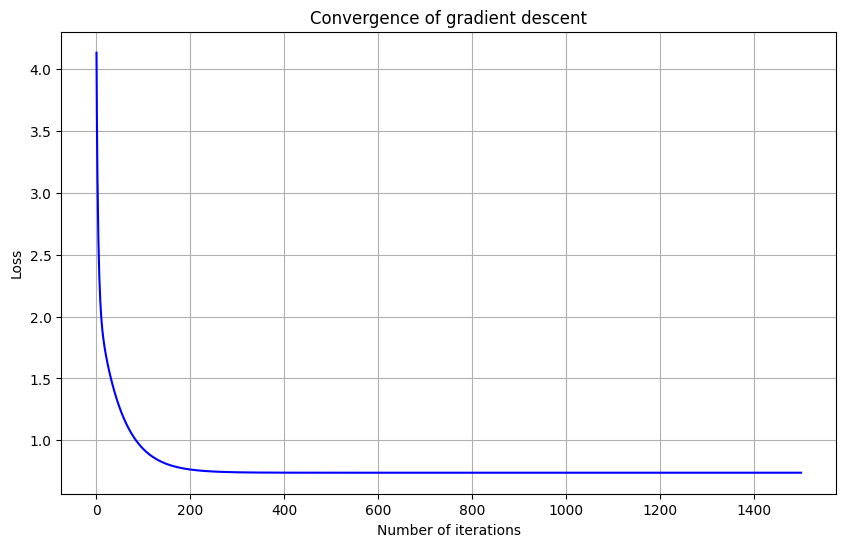

In [ ]:
plt.plot(range(1, iterations + 1), cost_history4, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [67]:
X_predict = np.hstack((X_0, X_1, X_2, X_3))
theta_predict = np.zeros(4)  #theta for multi-variable regression

theta_multi, _ = gradient_descent(X_predict, y, theta_predict, alpha, iterations)

X_new_multi = np.array([1, 1, 1, 1]) #new data
predicted_y_multi = X_new_multi.dot(theta_multi)

print("Predicted y for (1, 1, 1) :", predicted_y_multi)


Predicted y for (1, 1, 1) : 3.577408529345462


In [68]:
X_predict = np.hstack((X_0, X_1, X_2, X_3))
theta_predict = np.zeros(4)

theta_multi, _ = gradient_descent(X_predict, y, theta_predict, alpha, iterations)

X_new_multi = np.array([1, 2, 0, 4])
predicted_y_multi = X_new_multi.dot(theta_multi)

print("Predicted y for (2, 0, 4) :", predicted_y_multi)

Predicted y for (2, 0, 4) : 0.2443209702176523


In [69]:
X_predict = np.hstack((X_0, X_1, X_2, X_3))
theta_predict = np.zeros(4)

theta_multi, _ = gradient_descent(X_predict, y, theta_predict, alpha, iterations)

X_new_multi = np.array([1, 3, 2, 1])
predicted_y_multi = X_new_multi.dot(theta_multi)

print("Predicted y for (3, 2, 1) :", predicted_y_multi)

Predicted y for (3, 2, 1) : 0.1025340197359193
